In [110]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [111]:
rounds = 40
vehicle_limit = 20
all_routes = [[0, 1], [2, 3]]

In [112]:
record = pd.read_csv(f'No_conn2/Simulation_records/Round_{rounds}.csv')
utility = pd.read_csv(f'No_conn2/Utility_data/Round_{rounds}.csv')

In [113]:
record

,Vehicle_label,Road_order,Total_time,Leading_vehicles,Stopped_time,Stop_while_front,Round_number
0,0,"[2, 3]",67.75,"[-999, -999]","[0, 0]","[0, 0]",1
1,1,"[0, 1]",67.40,"[-999, -999]","[0, 0]","[0, 0]",1
2,2,"[2, 3]",70.80,"[0, 0]","[0, 0]","[0, 0]",1
3,3,"[2, 3]",72.70,"[2, 2]","[0, 0]","[0, 0]",1
4,4,"[0, 1]",70.10,"[1, 1]","[0, 0]","[0, 0]",1
...,...,...,...,...,...,...,...
795,15,"[0, 1]",75.50,"[14, 14]","[0, 0]","[0, 0]",40
796,16,"[0, 1]",76.60,"[15, 15]","[0, 0]","[0, 0]",40
797,17,"[0, 1]",77.70,"[16, 16]","[0, 0]","[0, 0]",40
798,18,"[2, 3]",76.55,"[10, 10]","[0, 0]","[0, 0]",40


In [114]:
record['Road_order'] = record.apply(lambda row: ast.literal_eval(row['Road_order']), axis=1)
record["Road_order_label"] = record.apply(lambda row: all_routes.index(row.Road_order), axis=1)

In [115]:
# time_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
# print(route_df.shape)
# display(route_df.head(10))

In [116]:
time_df = pd.pivot_table(record, values='Total_time', 
                         index=['Road_order_label', 'Round_number'], 
                         aggfunc=np.mean).reset_index(drop=False)
# time_df.loc[time_df.Road_order_label==1].sort_values('Round_number').Total_time.values

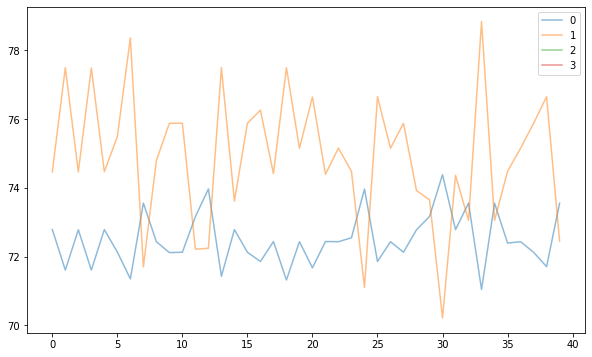

In [117]:
# Changes in average time needed to go through each route over time
plot_route_time = [[], [], [], []]

for i in range(2):
    times = time_df.loc[time_df.Road_order_label==i].sort_values('Round_number').Total_time.values
    plot_route_time[i]=times
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(4):
    ax.plot(plot_route_time[i], label=str(i), alpha=0.5)
    
plt.legend()

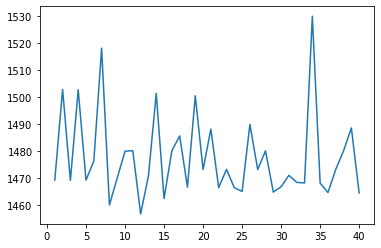

In [118]:
time_df2 = pd.pivot_table(record, values='Total_time', index='Round_number', aggfunc=np.sum).reset_index(drop=False)
plt.plot(time_df2.Round_number, time_df2.Total_time)

In [119]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-2.1100279844004475, -2.111034667964577]","[0.5002516708697785, 0.4997483291302215]","[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.081045,0.618277
1,1,"[-5.30298123351199, -5.310358707375212]","[0.5018443601005455, 0.49815563989945444]","[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, ...",0.984301,1.105358
2,2,"[-6.355787530181344, -6.365614028963478]","[0.5024566049280683, 0.4975433950719317]","[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...",0.945422,1.186541
3,3,"[-3.897021258111478, -3.913930922932415]","[0.5042273154769719, 0.4957726845230282]","[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...",1.010751,0.955772
4,4,"[-2.4119856064370664, -2.4134779596223543]","[0.5003730882270794, 0.4996269117729206]","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, ...",0.812278,0.717348
5,5,"[-4.161370625129194, -4.179051772489906]","[0.5044201716868438, 0.4955798283131562]","[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",0.809794,1.012561
6,6,"[-2.845426984967161, -2.854203857043014]","[0.5021942039333837, 0.49780579606661635]","[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, ...",1.010224,0.793563
7,7,"[-3.2798689886913728, -3.28892458443662]","[0.502263883465743, 0.4977361165342569]","[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, ...",1.429019,0.840908
8,8,"[-4.230592119118864, -4.2614343445124145]","[0.5077099451888797, 0.4922900548111203]","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, ...",1.204280,0.974880
9,9,"[-2.987800069302824, -3.007046528522468]","[0.5048114662814001, 0.4951885337186]","[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.978051,0.821948


In [120]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# prob_df = pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))
# print(prob_df.shape)
# display(prob_df.head(10))

In [121]:
utility['Routes_taken'] = utility.apply(lambda row: ast.literal_eval(row['Routes_taken']), axis=1)
route_df = pd.DataFrame(utility['Routes_taken'].to_list(), columns=range(rounds))
print(route_df.shape)
display(route_df.head(10))

(20, 40)


,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,1,0,0,1,1,1,1,0,1,0,...,0,1,0,1,0,0,1,0,1,1
1,0,1,1,1,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,1,0
2,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,1,0
3,1,0,1,1,1,0,1,0,0,0,...,0,1,0,0,0,1,1,1,1,0
4,0,1,0,0,0,1,1,0,1,1,...,1,0,0,1,1,1,0,0,1,0
5,0,1,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,1,1,0,1
6,1,0,1,1,0,0,1,0,1,1,...,0,0,1,1,1,0,0,1,1,0
7,0,1,0,1,0,0,0,1,0,1,...,0,0,1,1,1,0,0,1,1,1
8,0,1,0,1,1,1,1,0,1,0,...,0,0,0,1,0,1,0,0,1,1
9,1,0,0,1,0,1,0,0,1,1,...,0,0,0,0,1,1,0,1,0,0


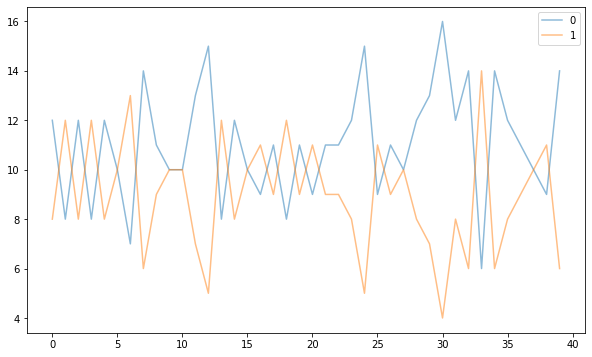

In [122]:
# Changes in number of vehicles that took the route over time
plot_route_l = [[], [], [], []]

for i in range(2):
    for j in range(rounds):
        plot_route_l[i].append(len(route_df.loc[route_df[j]==i]))
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_route_l[i], label=str(i), alpha=0.5)
    
plt.legend()

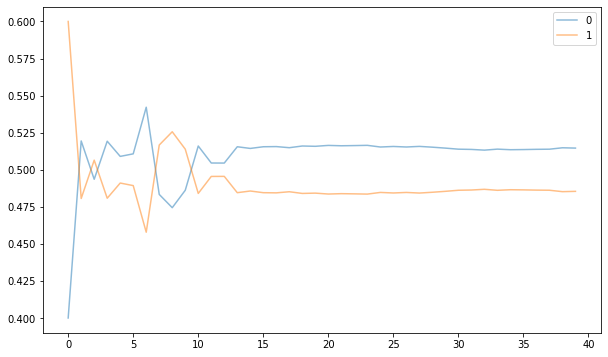

In [123]:
# Changes in vehicles' probabilities of selecting each route over time
plot_prob_l = [[], [], [], []]

for r in range(1, rounds+1):
    df = pd.read_csv(f'No_conn2/Utility_data/Round_{r}.csv')
    df['Probabilities'] = df.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
    for i in range(2):
        avg_prob = pd.DataFrame(df['Probabilities'].to_list(), columns=range(2))[i].mean()
        plot_prob_l[i].append(avg_prob)
        
        
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.plot(plot_prob_l[i], label=str(i), alpha=0.5)
    
plt.legend()

In [124]:
utility

,Vehicle_label,Utilities,Probabilities,Routes_taken,Gamma,Eta
0,0,"[-2.1100279844004475, -2.111034667964577]","[0.5002516708697785, 0.4997483291302215]","[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, ...",1.081045,0.618277
1,1,"[-5.30298123351199, -5.310358707375212]","[0.5018443601005455, 0.49815563989945444]","[0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, ...",0.984301,1.105358
2,2,"[-6.355787530181344, -6.365614028963478]","[0.5024566049280683, 0.4975433950719317]","[1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, ...",0.945422,1.186541
3,3,"[-3.897021258111478, -3.913930922932415]","[0.5042273154769719, 0.4957726845230282]","[1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...",1.010751,0.955772
4,4,"[-2.4119856064370664, -2.4134779596223543]","[0.5003730882270794, 0.4996269117729206]","[0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, ...",0.812278,0.717348
5,5,"[-4.161370625129194, -4.179051772489906]","[0.5044201716868438, 0.4955798283131562]","[0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, ...",0.809794,1.012561
6,6,"[-2.845426984967161, -2.854203857043014]","[0.5021942039333837, 0.49780579606661635]","[1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, ...",1.010224,0.793563
7,7,"[-3.2798689886913728, -3.28892458443662]","[0.502263883465743, 0.4977361165342569]","[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, ...",1.429019,0.840908
8,8,"[-4.230592119118864, -4.2614343445124145]","[0.5077099451888797, 0.4922900548111203]","[0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, ...",1.204280,0.974880
9,9,"[-2.987800069302824, -3.007046528522468]","[0.5048114662814001, 0.4951885337186]","[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, ...",0.978051,0.821948


In [125]:
# utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(df['Probabilities'].to_list(), columns=range(4))[i].mean()

In [126]:
plot_eta_prob = [[], [], [], []]

utility['Probabilities'] = utility.apply(lambda row: ast.literal_eval(row['Probabilities']), axis=1)
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

for i in range(2):
    plot_eta_prob[i]=pd.DataFrame(utility['Probabilities'].to_list(), columns=range(2))[i].values

In [127]:
# pd.DataFrame(utility['Probabilities'].to_list(), columns=range(4))[i].values

In [128]:
# len(utility.Eta.values), len(plot_eta_prob[1])

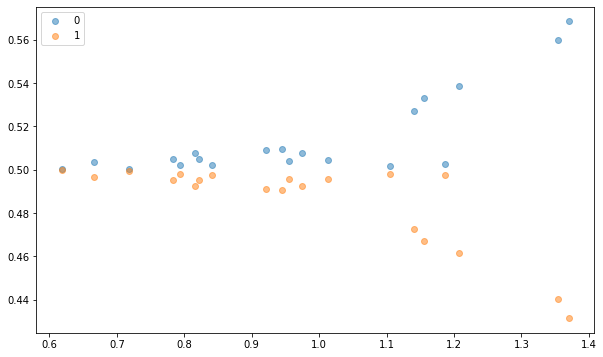

In [129]:
fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Eta.values, plot_eta_prob[i], label=str(i), alpha=0.5)
    
plt.legend()

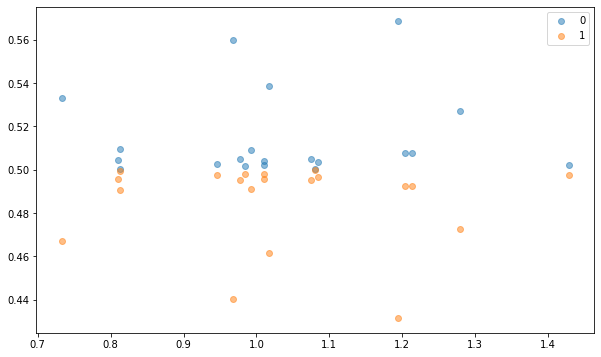

In [130]:
plot_gamma_prob = plot_eta_prob

fig, ax = plt.subplots(figsize=(10, 6))

for i in range(2):
    ax.scatter(utility.Gamma.values, plot_gamma_prob[i], label=str(i), alpha=0.5)
    
plt.legend()